In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv(r"C:\Users\fffmm\Desktop\Statistics & ML algo\Linear regression\USA_Housing.csv")

In [2]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [4]:
x=np.array(df[['Avg. Area House Age']])
y=np.array(df[['Price']])

In [5]:
x,y

(array([[5.68286132],
        [6.00289981],
        [5.86588984],
        ...,
        [7.25059061],
        [5.53438842],
        [5.99230531]]),
 array([[1059033.55787012],
        [1505890.91484695],
        [1058987.98787608],
        ...,
        [1030729.58315229],
        [1198656.87240769],
        [1298950.48026696]]))

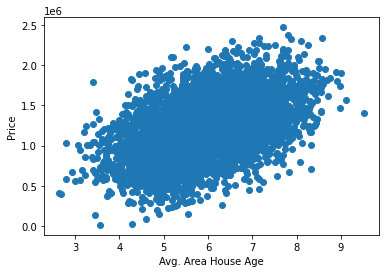

In [6]:
plt.scatter(x,y)
plt.xlabel('Avg. Area House Age')
plt.ylabel('Price')
plt.show()

In [7]:
x_mean=np.mean(x)
y_mean=np.mean(y)

In [8]:
x_mean,y_mean

(5.977222035280273, 1232072.654142357)

### To calculate value of coefficients and intercept

In [9]:
numerator=0
denominator=0
for i in range(len(x)):
    numerator+=(x[i]-x_mean)*(y[i]-y_mean)
    denominator+=(x[i]-x_mean)**2
    
coefficient=numerator/denominator
intercept=y_mean-(coefficient*x_mean)

In [10]:
float(coefficient),float(intercept)

(161177.8209736202, 268677.0310203753)

In [11]:
y_pred=coefficient*x+intercept

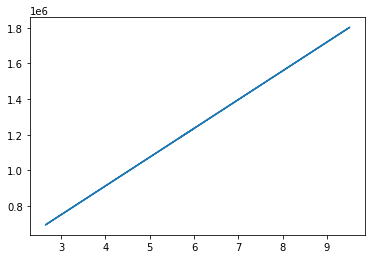

In [12]:
plt.plot(x,y_pred)

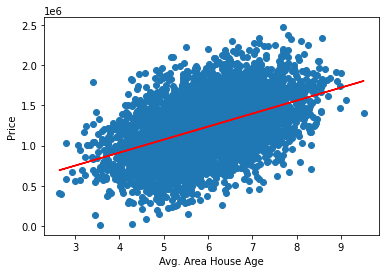

In [13]:
plt.scatter(x,y)
plt.xlabel('Avg. Area House Age')
plt.ylabel('Price')
plt.plot(x,y_pred,c='red')
plt.show()

### R-square = 1- (SSR/SST)
### SSR: square of sum of residual errors (diff b/w y,y_pred)
### SST: square of sum of total errors (diff b/w y,y_mean)

In [14]:
ssr=0
sst=0
for i in range(len(x)):
    sst+=(y[i]-y_mean)**2
    ssr+=(y[i]-y_pred[i])**2
r_sq=1-(ssr/sst)
print("Coefficient of determination ,R square value is : ",float(r_sq))

Coefficient of determination ,R square value is :  0.2047947479561858


## Now let's compare with built-in model

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [17]:
lr=LinearRegression()

In [18]:
lr.fit(x_train,y_train)

LinearRegression()

In [19]:
y_pred1=lr.predict(x_test)

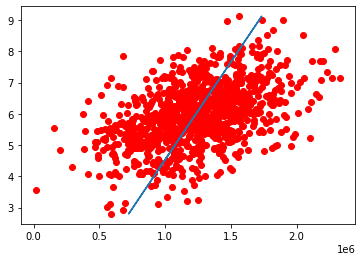

In [20]:
plt.plot(y_pred1,x_test)
plt.scatter(y_test,x_test,c='red')

In [22]:
lr.score(x_test,y_test)

0.2105405783866695

In [ ]:
### Close to R square value